In this project I will explore a dataset on Starbuck's Malaysia customer survey, analyse some main features and findings, and use a Kemans clustering algorithm to study the dataset and segment customers into groups.


In [84]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
Starbucks=pd.read_csv("C:/Users/cana/Desktop/文件/python/Starbucks satisfactory survey.csv")

In [23]:
Starbucks.head(10)

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
5,2019/10/01 12:39:39 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,No,...,Less than RM20,4,3,5,5,4,5,4,Social Media,Yes
6,2019/10/01 12:39:42 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,within 1km,Yes,...,Around RM20 - RM40,5,5,5,5,3,5,5,Starbucks Website/Apps;Social Media,Yes
7,2019/10/01 12:40:58 PM GMT+8,Male,From 20 to 29,Employed,"RM50,000 - RM100,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,2,3,3,3,3,3,Starbucks Website/Apps;Social Media;Emails;Thr...,Yes
8,2019/10/01 12:42:27 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,more than 3km,Yes,...,More than RM40,5,4,4,4,4,4,4,Starbucks Website/Apps;Social Media;Through fr...,Yes
9,2019/10/01 12:43:36 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Take away,Below 30 minutes,more than 3km,No,...,Around RM20 - RM40,4,3,3,4,3,3,4,Social Media;Through friends and word of mouth,Yes


In [24]:
Starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

we will clear the coolumns that do not contribute to analysis of customer behavior and change the header for each column first


In [27]:
Starbucks=Starbucks.drop('Timestamp',axis=1)
Starbucks.columns=['Gender','Age','Status','Income','Frequency','Enjoyment','timepervisit','nearest','membership','fequencyofpurchase','spending','comparerate','pricerate','promotion','rateambiance','Wifi','rateservice','situational','source','loyalty']

In [28]:
Starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              122 non-null    object
 1   Age                 122 non-null    object
 2   Status              122 non-null    object
 3   Income              122 non-null    object
 4   Frequency           122 non-null    object
 5   Enjoyment           121 non-null    object
 6   timepervisit        122 non-null    object
 7   nearest             122 non-null    object
 8   membership          122 non-null    object
 9   fequencyofpurchase  122 non-null    object
 10  spending            122 non-null    object
 11  comparerate         122 non-null    int64 
 12  pricerate           122 non-null    int64 
 13  promotion           122 non-null    int64 
 14  rateambiance        122 non-null    int64 
 15  Wifi                122 non-null    int64 
 16  rateservice         122 no

In [31]:
Starbucks=Starbucks.dropna()


In [32]:
Starbucks.describe()

,comparerate,pricerate,promotion,rateambiance,Wifi,rateservice,situational
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,3.685950,2.909091,3.818182,3.760331,3.256198,3.752066,3.520661
std,0.913173,1.072381,1.064581,0.931171,0.962020,0.829468,1.033595
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We can see that average price rating is 3, comparing with other coffee retailers rating is 3.6, wifi rating is 3.2, rating for ambiance is 3.7 and service rating is 3.7.
Overall the rating performance is quite decent, we can examine how closely correlated each rating is with if the customer is going to visit again, but first transform the loyalty column to 1 and 0, with 1 indicating will visit again and 0 indicating will not.


In [34]:
Starbucks.loyalty.replace(('yes','no'),(1,0),inplace=True)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
log=LogisticRegression()
x=Starbucks[['comparerate','pricerate','promotion','rateambiance','Wifi','rateservice']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
y=Starbucks['loyalty']
model=log.fit(X_scaled,y)
np.array(model.coef_)



array([[ 0.47213659,  1.01208935,  0.08612373,  0.31996509, -0.03783657,
        -0.11263459]])

we can see that the highest price rating is highly correlated, followed by comparsion rating with other coffee sellers, wifi and service rating followed a surprisingly negative linear correlation, this may show the pricing strategy is starbucks will be very crucial and that Starbucks should continue to strengthen it's competitive advantage in order to gain more support from customers

Now let's look at age, status and income factors


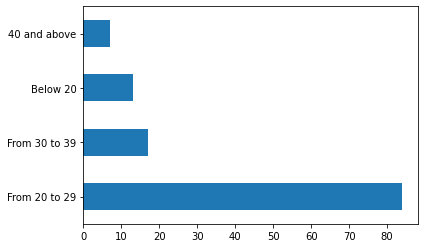

In [85]:
Starbucks.Age.value_counts()
Starbucks['Age'].value_counts().plot(kind='barh')

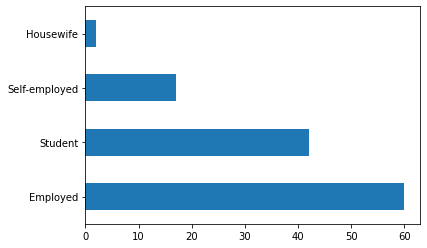

In [86]:
Starbucks['Status'].value_counts().plot(kind='barh')

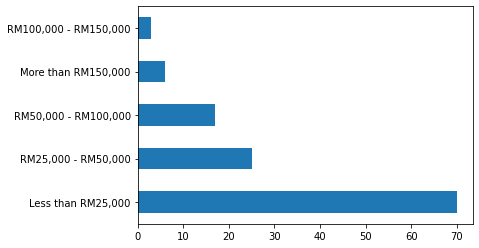

In [87]:
Starbucks['Income'].value_counts().plot(kind='barh')

we can see that most of its customers come from age group of 20-29, mostly employed and have income less than RM 25,000. What this might mean is that starbucks should tailor its price towards lower income groups, and maintain its unique selling point of fast and convinent, serving the majority of its customer who are employed and at a quite young age.

How I would like to see which of these three factors have most influence on the frenquency of purchase and amount spent each time

In [88]:
Starbucks.Age.value_counts()

From 20 to 29    84
From 30 to 39    17
Below 20         13
40 and above      7
Name: Age, dtype: int64

In [91]:
Starbucks.Age.replace(('From 20 to 29','From 30 to 39','Below 20','40 and above'),(2,3,1,4),inplace=True)

In [111]:
Starbucks.Status.value_counts()

2    60
1    42
3    17
4     2
Name: Status, dtype: int64

In [110]:
Starbucks.Status.replace(('Employed','Student','Self-employed','Housewife'),(2,1,3,4),inplace=True)

In [108]:
Starbucks.Income.value_counts()

1    70
2    25
3    17
4     6
5     3
Name: Income, dtype: int64

In [105]:
Starbucks.Income.replace(('Less than RM25,000','RM25,000 - RM50,000','RM50,000 - RM100,000','More than RM150,000','RM100,000 - RM150,000'),(1,2,3,4,5),inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [107]:
Starbucks.head()

,Gender,Age,Status,Income,Frequency,Enjoyment,timepervisit,nearest,membership,fequencyofpurchase,spending,comparerate,pricerate,promotion,rateambiance,Wifi,rateservice,situational,source,loyalty
0,Female,2,1,1,Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,2,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,Female,2,1,1,Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,2,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,Male,2,2,1,Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,2,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,Female,2,1,1,Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,2,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,Male,2,1,1,Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,3,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [112]:
Starbucks.spending.value_counts()

2    58
3    45
1    11
4     7
Name: spending, dtype: int64

In [99]:
Starbucks.spending.replace(('Less than RM20','Around RM20 - RM40','Zero','More than RM40' ),(2,3,1,4),inplace=True)

In [121]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
x1=Starbucks[['Age','Status','Income']]
X1_scaled = scaler.fit_transform(x1)
y1=Starbucks['spending']
model2=lm.fit(X1_scaled,y1)
model2.coef_

array([0.20571845, 0.02571592, 0.07414746])

there is a weak correlation between amount spent and age,indicating that as age increases amount spent increases, however the correlation is not very significant 